# Data exploration analysis

In [28]:
# Import modules and import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
test = pd.read_csv("Data/test.csv")
train = pd.read_csv("Data/train.csv")

In [29]:
# Get an overview of the dataset
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [30]:
# Seperate the data into Survived vs. Died
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]


In [31]:
# Explore age column
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

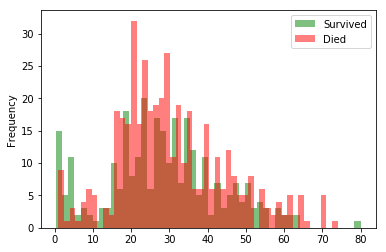

In [32]:
# Plot the survival counts for age
survived["Age"].plot.hist(alpha=0.5,color='green',bins=50)
died["Age"].plot.hist(alpha=0.5,color='red',bins=50)
plt.legend(['Survived','Died'])
plt.show()

Here we can see the survival counts by different ages. Besides the 0-5 years old who had a significantly higher survival rate, the relationship is not immediately visible to us. Therefore, we would need to transform the Age column for better understanding of its relationship to survival, and be used in machine learning models

In [33]:
#Transform the age column into 6 groups + 1 missing value group which we would be dealing with later
train['Age_test']=train['Age'].fillna(-99)
test['Age_test']=test['Age'].fillna(-99)
age_group_label=['Missing value','Toddler/Infant','Child','Teenage','Young Adult','Adult','Elderly']
intervals=[-100,0,5,12,18,30,60,150]
train['Age_group']=pd.cut(train['Age_test'],intervals,labels=age_group_label)
test['Age_group']=pd.cut(test['Age_test'],intervals,labels=age_group_label)
#train['Age_group'].describe()

In [34]:
train['Age_group'].value_counts()

Adult             283
Young Adult       270
Missing value     177
Teenage            70
Toddler/Infant     44
Child              25
Elderly            22
Name: Age_group, dtype: int64

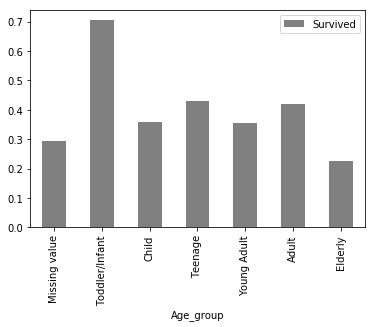

In [35]:
# Plot the survival rate for age groups
age_group_pivot = train.pivot_table(index="Age_group",values="Survived")
age_group_pivot.plot.bar(color='grey')
plt.show()

Here we can clearly see that the infant age group has a much higher survival chance than any other age groups. On the other end, the elderly people has a moderately low survival average of 25%.

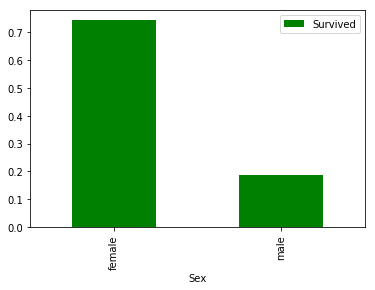

In [36]:
# Plot the survival rate for genders
sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar(color='green')
plt.show()

Females have a much higher chance to survive compared to men, which is kind of expected


In [37]:
train.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_test
Sex,,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,6.493631
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,2.847782


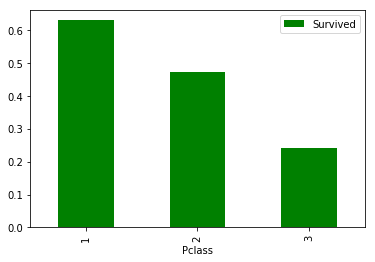

In [38]:
# Plot the survival rate for ticket class
pclass_pivot = train.pivot_table(index="Pclass",values="Survived")
pclass_pivot.plot.bar(color='green')
plt.show()

In [39]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Age_test
Pclass,,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687,19.173241
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183,22.172989
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550,-9.244562


In [40]:
train.groupby(['Pclass','Sex']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare   Age_test  
Pclass Sex                            
1      female  106.125798  21.819149  
       male     67.226127  17.134590  
2      female   21.970121  25.361842  
       male     19.741782  19.928981  
3      female   16.118810 -13.468750  
       male     12.661633  -7.491585

# Explore missing data

In [41]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_test         0
Age_group        0
dtype: int64

As we can see we have a decent amount of missing values for age column, few in embarked column, and a lot of missing ones in cabin column.

Let's deal with the age column first. Instead of filling in missing values using the mean/median age of the entire training set, we can infer that age might be related to the ticket class of each passenger. Moreover, in the name column, we can see that each one has a title to his/her name. We can probably use these info to better filling in the missing values for age.

In [42]:
train['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [43]:
#We can parse out the title in each name
train['title']=train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['title']=test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
train['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Capt              1
Jonkheer          1
Mme               1
Don               1
the Countess      1
Ms                1
Lady              1
Sir               1
Name: title, dtype: int64

In [44]:
age_mean=train.pivot_table(index='title',values='Age')
age_mean

,Age
title,
Capt,70.000000
Col,58.000000
Don,40.000000
Dr,42.000000
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,4.574167
Miss,21.773973


In [45]:
# Group the data by sex/ticket class/title
grouped_train = train.groupby(['Sex','Pclass', 'title'])  
grouped_test = test.groupby(['Sex','Pclass', 'title']) 
grouped_train.Age.median()

Sex     Pclass  title       
female  1       Dr              49.0
                Lady            48.0
                Miss            30.0
                Mlle            24.0
                Mme             24.0
                Mrs             41.5
                the Countess    33.0
        2       Miss            24.0
                Mrs             32.0
                Ms              28.0
        3       Miss            18.0
                Mrs             31.0
male    1       Capt            70.0
                Col             58.0
                Don             40.0
                Dr              44.0
                Jonkheer        38.0
                Major           48.5
                Master           4.0
                Mr              40.0
                Sir             49.0
        2       Dr              38.5
                Master           1.0
                Mr              31.0
                Rev             46.5
        3       Master           4.0
         

In [46]:
#Finally, we can use the median age we derived above to fill in the missing age values
train['Age']=grouped_train.Age.apply(lambda x: x.fillna(x.median()))
test['Age']=grouped_test.Age.apply(lambda x: x.fillna(x.median()))
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_test         0
Age_group        0
title            0
dtype: int64

In [47]:
#Deal with embarked column now
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [48]:
#Filling embarked missing values with the most common one for now
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Embarked']=test['Embarked'].fillna(test['Embarked'].mode()[0])
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Age_test         0
Age_group        0
title            0
dtype: int64

In [49]:
#Finally, let's look at cabin column
#From the data exploration, we can see that the cabin values always contain a letter in the first place
#We may assume that this letter refers to the cabin class
train['Cabin'].str[0].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [50]:
# We can fill in the missing value of 'U' for now to represent 'Unknown'
train['Cabin']=train['Cabin'].str[0]
train['Cabin']=train['Cabin'].fillna('U')
test['Cabin']=test['Cabin'].str[0]
test['Cabin']=test['Cabin'].fillna('U')

In [51]:
train['Cabin'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [52]:
#Make sure no missing value left in dataframe
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Age_test       0
Age_group      0
title          0
dtype: int64

# Data transformation
For columns that are categorical variables (Sex, Age_group, Pclass), we have to make dummy columns for each of those. Otherwise, using numeric values to represent these columns in the model would be meaningless and inaccurate.

In [53]:
#Create the dummy columns for the categorical columns, and append to the dataset
def get_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in ['Pclass','Sex','Age_group','Cabin','Embarked']:
    train = get_dummies(train,column)
    test = get_dummies(test,column)

In [54]:
#Create the new family size column so we don't have to use the SibSp/Parch variales
train['Family_size']=train['SibSp']+train['Parch']+1

In [55]:
#Correlation might not be useful here since the target column is a binary variable???
train.corr()['Survived']

PassengerId                -0.005007
Survived                    1.000000
Pclass                     -0.338481
Age                        -0.061171
SibSp                      -0.035322
Parch                       0.081629
Fare                        0.257307
Age_test                    0.072253
Pclass_1                    0.285904
Pclass_2                    0.093349
Pclass_3                   -0.322308
Sex_female                  0.543351
Sex_male                   -0.543351
Age_group_Missing value    -0.092197
Age_group_Toddler/Infant    0.150304
Age_group_Child            -0.008328
Age_group_Teenage           0.026859
Age_group_Young Adult      -0.038348
Age_group_Adult             0.051424
Age_group_Elderly          -0.051224
Cabin_A                     0.022287
Cabin_B                     0.175095
Cabin_C                     0.114652
Cabin_D                     0.150716
Cabin_E                     0.145321
Cabin_F                     0.057935
Cabin_G                     0.016040
C

In [56]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_test', 'Age_group',
       'title', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_group_Missing value', 'Age_group_Toddler/Infant',
       'Age_group_Child', 'Age_group_Teenage', 'Age_group_Young Adult',
       'Age_group_Adult', 'Age_group_Elderly', 'Cabin_A', 'Cabin_B', 'Cabin_C',
       'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Family_size'],
      dtype='object')

# Variable selection

In [57]:
#把所有的numeric都选上了
features=['Fare','Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_group_Missing value', 'Age_group_Toddler/Infant',
       'Age_group_Child', 'Age_group_Teenage', 'Age_group_Young Adult',
       'Age_group_Adult', 'Age_group_Elderly', 'Cabin_A', 'Cabin_B', 'Cabin_C',
       'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Family_size']

# Build model

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
# Use 1/5 of the training set as the model test set
model_train=train[:713]
model_test=train[713:]
lr.fit(model_train[features], model_train["Survived"])
predictions=lr.predict(model_test[features])
accuracy = accuracy_score(model_test['Survived'], predictions)

/Users/carzhou/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:
accuracy

0.848314606741573

# Accuracy of 85%! SO NB! HALA MADRID!